<a href="https://colab.research.google.com/github/biruk-tafese/MachineLearingIntern/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier  # For classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay


data = pd.read_csv("crop_data.csv")

In [ ]:
data.head


In [5]:
# Load and preprocess data
X = data.drop('label', axis=1)
y = data['label']


In [ ]:
print("Sample features (X):")
print(X[:5])  # Print first 5 rows of features

print("\nSample target variable (y):")
print(y[:5])  # Print first 5 rows of target variable

In [64]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
# Create the Random Forest model
model = RandomForestClassifier(n_estimators=5, max_depth=10, random_state=42)  # Adjust hyperparameters as needed

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=5, random_state=42)

In [68]:
y_pred = model.predict(X_test)


In [ ]:
y_pred

In [77]:
#evaluate model performance
from sklearn.metrics import accuracy_score, classification_report
import graphviz
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [ ]:
report

In [ ]:
accuracy

In [ ]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [14]:
#feature importance
feature_importances = model.feature_importances_


In [ ]:
feature_importances

In [ ]:
best_features = np.array(feature_importances)
thresold = 0.04
# Define the threshold for feature selection
threshold = 0.04  # You can adjust this threshold based on your preference

# Filter features based on the threshold
selected_features_indices = np.where(feature_importances > threshold)[0]
# Print selected features' indices and importance values
for idx in selected_features_indices:
    print(f"Feature {idx}: Importance = {feature_importances[idx]}")

# Use the selected features for further analysis or model training
selected_features = selected_features_indices.tolist()
print("Selected Features:", selected_features)

In [78]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a78537e0b0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a78537e440>})

In [79]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 14, 'n_estimators': 190}


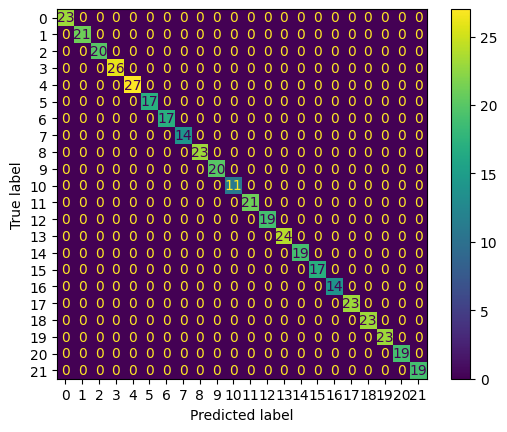

In [80]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision_micro = precision_score(y_test, y_pred, average='weighted')
recall_micro = recall_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision (weighted):", precision_micro)
print("Recall (Micro):", recall_micro)


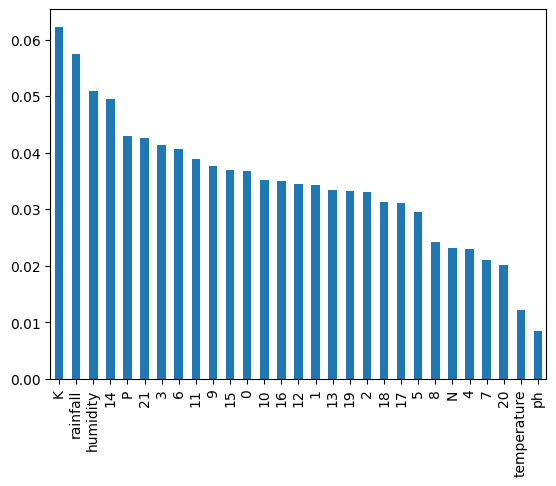

In [87]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [88]:
import pandas as pd

# Sample test data
test_data = {
    'N': [0.642857, 0.607143, 0.428571],
    'P': [0.264286, 0.378571, 0.357143],
    'K': [0.190, 0.180, 0.195],
    'temperature': [0.345886, 0.371445, 0.406854],
    'humidity': [0.790267, 0.770633, 0.793977],
    'ph': [0.466264, 0.549480, 0.674219],
    'rainfall': [0.656458, 0.741675, 0.875710],
    '0': [0.0, 0.0, 0.0],    # Add values for feature 0
    '1': [0.0, 0.0, 0.0],    # Add values for feature 1
    '2': [0.0, 0.0, 0.0],    # Add values for feature 2
    '3': [0.0, 0.0, 0.0],    # Add values for feature 3
    '4': [0.0, 0.0, 0.0],    # Add values for feature 4
    '5': [0.0, 0.0, 0.0],    # Add values for feature 5
    '6': [0.0, 0.0, 0.0],    # Add values for feature 6
    '7': [0.0, 0.0, 0.0],    # Add values for feature 7
    '8': [0.0, 0.0, 0.0],    # Add values for feature 8
    '9': [0.0, 0.0, 0.0],    # Add values for feature 9
    '10': [0.0, 0.0, 0.0],   # Add values for feature 10
    '11': [0.0, 0.0, 0.0],   # Add values for feature 11
    '12': [0.0, 0.0, 0.0],   # Add values for feature 12
    '13': [0.0, 0.0, 0.0],   # Add values for feature 13
    '14': [0.0, 0.0, 0.0],   # Add values for feature 14
    '15': [0.0, 0.0, 0.0],   # Add values for feature 15
    '16': [0.0, 0.0, 0.0],   # Add values for feature 16
    '17': [1.0, 1.0, 1.0],   # Add values for feature 17
    '18': [0.0, 0.0, 0.0],   # Add values for feature 18
    '19': [0.0, 0.0, 0.0],   # Add values for feature 19
    '20': [0.0, 0.0, 0.0],   # Add values for feature 20
    '21': [0.0, 0.0, 0.0]    # Add values for feature 21
}

# Create a DataFrame from the test data
test_df = pd.DataFrame(test_data)

# Assuming you have a model named 'model' that is trained and loaded
# Replace with your actual prediction code
y_pred = model.predict(test_df)

# Create a DataFrame from the predictions
predictions_df = pd.DataFrame({'Predicted_Labels': y_pred})

# Display the DataFrame in the notebook
predictions_df


,Predicted_Labels
0,mothbeans
1,mothbeans
2,mothbeans


In [58]:
import pandas as pd

# Sample test data
test_data = {
    'N': [0],
    'P': [0],
    'K': [0],
    'temperature': [0],
    'humidity': [0],
    'ph': [0],
    'rainfall': [0],
    '0': [1.0],
    '1': [0.0],
    '2': [0.0],
    '3': [0.0],
    '4': [0.0],
    '5': [0.0],
    '6': [0.0],
    '7': [0.0],
    '8': [0.0],
    '9': [0.0],
    '10': [0.0],
    '11': [0.0],
    '12': [0.0],
    '13': [0.0],
    '14': [1.0],
    '15': [0.0],
    '16': [0.0],
    '17': [1.0],
    '18': [1.0],
    '19': [0.0],
    '20': [0.0],
    '21': [0.0],
}

# Create a DataFrame from the test data
test_df = pd.DataFrame(test_data)

# Assuming you have a model named 'model' that is trained and loaded
# Replace with your actual prediction code
y_pred = model.predict(test_df)

# Create a DataFrame from the predictions
predictions_df = pd.DataFrame({'Predicted_Labels': y_pred})

# Display the DataFrame in the notebook
predictions_df


,Predicted_Labels
0,lentil


In [62]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Sample test data
test_data = {
    'N': [0.714286, 0.471429, 0.385714],
    'P': [0.264286, 0.378571, 0.214286],
    'K': [0.180, 0.225, 0.150],
    'temperature': [0.410886, 0.331445, 0.296854],
    'humidity': [0.740267, 0.690633, 0.803977],
    'ph': [0.546264, 0.589480, 0.734219],
    'rainfall': [0.641458, 0.512675, 0.925710],
    '0': [1.0, 0.0, 1.0],
    '1': [0.0, 1.0, 0.0],
    '2': [0.0, 0.0, 1.0],
    '3': [0.0, 1.0, 0.0],
    '4': [1.0, 0.0, 1.0],
    '5': [0.0, 0.0, 0.0],
    '6': [1.0, 1.0, 0.0],
    '7': [0.0, 1.0, 1.0],
    '8': [1.0, 0.0, 0.0],
    '9': [0.0, 1.0, 1.0],
    '10': [1.0, 0.0, 0.0],
    '11': [0.0, 0.0, 1.0],
    '12': [0.0, 1.0, 0.0],
    '13': [0.0, 1.0, 1.0],
    '14': [0.0, 0.0, 0.0],
    '15': [1.0, 0.0, 1.0],
    '16': [0.0, 1.0, 0.0],
    '17': [1.0, 0.0, 1.0],
    '18': [0.0, 0.0, 1.0],
    '19': [1.0, 1.0, 0.0],
    '20': [0.0, 1.0, 1.0],
    '21': [1.0, 0.0, 0.0],
}

# True labels for the test data
true_labels = ['blackgram', 'maize', 'blackgram']  # Replace with actual true labels

# Create a DataFrame from the test data
test_df = pd.DataFrame(test_data)

# Assuming you have a model named 'model' that is trained and loaded
# Replace with your actual prediction code
y_pred = model.predict(test_df)

# Calculate accuracy
accuracy = accuracy_score(true_labels, y_pred)

# Create a DataFrame from the predictions
predictions_df = pd.DataFrame({'Predicted_Labels': y_pred})

# Display the DataFrame and accuracy in the notebook
print(predictions_df)
print(f'Accuracy: {accuracy:.2f}')


  Predicted_Labels
0        blackgram
1            maize
2        blackgram
Accuracy: 1.00
